In [30]:
import pandas as pd
import yfinance as yf

In [31]:
ticker = yf.Ticker('AAPL')
data = ticker.history(period='10y')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-07-13 00:00:00-04:00,28.002575,28.166071,27.843558,28.143675,165762000,0.0,0.0
2015-07-14 00:00:00-04:00,28.228777,28.302686,28.004810,28.132471,127072400,0.0,0.0
2015-07-15 00:00:00-04:00,28.157110,28.477382,28.125755,28.403473,134596800,0.0,0.0
2015-07-16 00:00:00-04:00,28.609525,28.795419,28.522178,28.781979,144889600,0.0,0.0
2015-07-17 00:00:00-04:00,28.909638,29.030579,28.737183,29.030579,184658800,0.0,0.0


In [32]:
data.to_csv('AAPL.csv')

In [33]:
df = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-07-13 00:00:00-04:00,28.002575,28.166071,27.843558,28.143675,165762000,0.0,0.0
2015-07-14 00:00:00-04:00,28.228777,28.302686,28.004810,28.132471,127072400,0.0,0.0
2015-07-15 00:00:00-04:00,28.157110,28.477382,28.125755,28.403473,134596800,0.0,0.0
2015-07-16 00:00:00-04:00,28.609525,28.795419,28.522178,28.781979,144889600,0.0,0.0
2015-07-17 00:00:00-04:00,28.909638,29.030579,28.737183,29.030579,184658800,0.0,0.0


In [34]:
df['daily_return'] = df['Close'].pct_change()
df['SMA_20'] = df['Close'].rolling(20).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,SMA_20,SMA_50
Date,,,,,,,,,,
2015-07-13 00:00:00-04:00,28.002575,28.166071,27.843558,28.143675,165762000,0.0,0.0,NaN,NaN,NaN
2015-07-14 00:00:00-04:00,28.228777,28.302686,28.004810,28.132471,127072400,0.0,0.0,-0.000398,NaN,NaN
2015-07-15 00:00:00-04:00,28.157110,28.477382,28.125755,28.403473,134596800,0.0,0.0,0.009633,NaN,NaN
2015-07-16 00:00:00-04:00,28.609525,28.795419,28.522178,28.781979,144889600,0.0,0.0,0.013326,NaN,NaN
2015-07-17 00:00:00-04:00,28.909638,29.030579,28.737183,29.030579,184658800,0.0,0.0,0.008637,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-07-07 00:00:00-04:00,212.679993,216.229996,208.800003,209.949997,50229000,0.0,0.0,-0.016858,202.4240,203.761371
2025-07-08 00:00:00-04:00,210.100006,211.429993,208.449997,210.009995,42848900,0.0,0.0,0.000286,202.7285,203.799628
2025-07-09 00:00:00-04:00,209.529999,211.330002,207.220001,211.139999,48749400,0.0,0.0,0.005381,203.2130,203.842310


In [35]:
df['signal'] = (df['SMA_20'] > df['SMA_50']).astype(int)
df['position'] = df['signal'].shift(1)
df['strategy_return'] = df['daily_return'] * df['position']
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,SMA_20,SMA_50,signal,position,strategy_return
Date,,,,,,,,,,,,,
2015-07-13 00:00:00-04:00,28.002575,28.166071,27.843558,28.143675,165762000,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN
2015-07-14 00:00:00-04:00,28.228777,28.302686,28.004810,28.132471,127072400,0.0,0.0,-0.000398,NaN,NaN,0,0.0,-0.0
2015-07-15 00:00:00-04:00,28.157110,28.477382,28.125755,28.403473,134596800,0.0,0.0,0.009633,NaN,NaN,0,0.0,0.0
2015-07-16 00:00:00-04:00,28.609525,28.795419,28.522178,28.781979,144889600,0.0,0.0,0.013326,NaN,NaN,0,0.0,0.0
2015-07-17 00:00:00-04:00,28.909638,29.030579,28.737183,29.030579,184658800,0.0,0.0,0.008637,NaN,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07 00:00:00-04:00,212.679993,216.229996,208.800003,209.949997,50229000,0.0,0.0,-0.016858,202.4240,203.761371,0,0.0,-0.0
2025-07-08 00:00:00-04:00,210.100006,211.429993,208.449997,210.009995,42848900,0.0,0.0,0.000286,202.7285,203.799628,0,0.0,0.0
2025-07-09 00:00:00-04:00,209.529999,211.330002,207.220001,211.139999,48749400,0.0,0.0,0.005381,203.2130,203.842310,0,0.0,0.0


In [42]:
# compare buy_and_hold vs SMA_strategy
capital = 100_000
df['buy_and_hold_pnl'] = capital * (1 + df['daily_return']).cumprod()
df['SMA_strategy_pnl'] = capital * (1 + df['strategy_return']).cumprod()
df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,SMA_20,SMA_50,signal,position,strategy_return,buy_and_hold_pnl,SMA_strategy_pnl
Date,,,,,,,,,,,,,,,
2015-07-13 00:00:00-04:00,28.002575,28.166071,27.843558,28.143675,165762000,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2015-07-14 00:00:00-04:00,28.228777,28.302686,28.004810,28.132471,127072400,0.0,0.0,-0.000398,NaN,NaN,0,0.0,-0.0,99960.190821,100000.000000
2015-07-15 00:00:00-04:00,28.157110,28.477382,28.125755,28.403473,134596800,0.0,0.0,0.009633,NaN,NaN,0,0.0,0.0,100923.113457,100000.000000
2015-07-16 00:00:00-04:00,28.609525,28.795419,28.522178,28.781979,144889600,0.0,0.0,0.013326,NaN,NaN,0,0.0,0.0,102268.018516,100000.000000
2015-07-17 00:00:00-04:00,28.909638,29.030579,28.737183,29.030579,184658800,0.0,0.0,0.008637,NaN,NaN,0,0.0,0.0,103151.343126,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07 00:00:00-04:00,212.679993,216.229996,208.800003,209.949997,50229000,0.0,0.0,-0.016858,202.4240,203.761371,0,0.0,-0.0,745993.542292,306779.777409
2025-07-08 00:00:00-04:00,210.100006,211.429993,208.449997,210.009995,42848900,0.0,0.0,0.000286,202.7285,203.799628,0,0.0,0.0,746206.725393,306779.777409
2025-07-09 00:00:00-04:00,209.529999,211.330002,207.220001,211.139999,48749400,0.0,0.0,0.005381,203.2130,203.842310,0,0.0,0.0,750221.854507,306779.777409


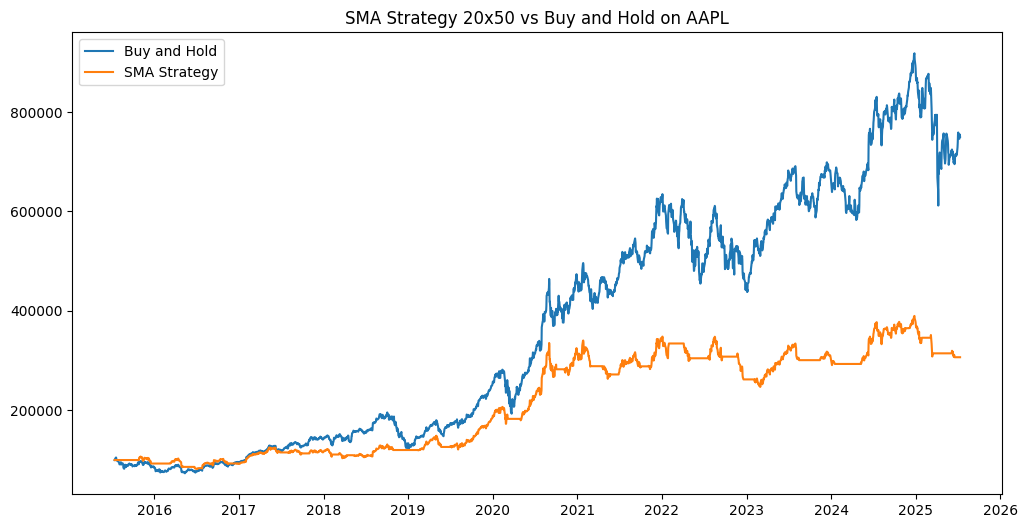

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['buy_and_hold_pnl'], label='Buy and Hold')
plt.plot(df['SMA_strategy_pnl'], label='SMA Strategy')
plt.title('SMA Strategy 20x50 vs Buy and Hold')
plt.legend()
plt.show()

In [ ]:
# Calculate SMA strategy metrics
df['cumulative_return'] = (1 + df['strategy_return']).cumprod()
cumulated_return_sma = df['cumulative_return'].iloc[-1] - 1
ann_return_sma = (cumulated_return_sma) ** (252 / len(df)) - 1
volatility_sma = df['strategy_return'].std() * (252 ** 0.5)
risk_adjusted_return_sma = ann_return_sma / volatility_sma

# Calculate Buy and Hold strategy metrics
df['buy_and_hold_return'] = (1 + df['daily_return']).cumprod()
cumulated_return_bh = df['buy_and_hold_return'].iloc[-1] - 1
ann_return_bh = (cumulated_return_bh) ** (252 / len(df)) - 1
volatility_bh = df['daily_return'].std() * (252 ** 0.5)
risk_adjusted_return_bh = ann_return_bh / volatility_bh

# Max DD SMA
window = 1000
roll_max = df['Close'].rolling(window, min_periods=1).max()
daily_dd_sma = df['Close'] / roll_max - 1
max_dd_sma = daily_dd_sma.min()

# Max DD BH
roll_max_bh = df['buy_and_hold_return'].rolling(window, min_periods=1).max()
daily_dd_bh = df['buy_and_hold_return'] / roll_max_bh - 1
max_dd_bh = daily_dd_bh.min()

# Print SMA strategy metrics
print("SMA Strategy Metrics:")
print(f'Cumulated return: {cumulated_return_sma:.2%}')
print(f'Annualized return: {ann_return_sma:.2%}')
print(f'Volatility: {volatility_sma:.2%}')
print(f'Risk adjusted return: {risk_adjusted_return_sma:.2f}')
print(f"Max Drawdown: {max_dd_sma:.2%}")

# Print BH strategy metrics
print("\nBuy and Hold Strategy Metrics:")
print(f'Cumulated return: {cumulated_return_bh:.2%}')
print(f'Annualized return: {ann_return_bh:.2%}')
print(f'Volatility: {volatility_bh:.2%}')
print(f'Risk adjusted return: {risk_adjusted_return_bh:.2f}')
print(f"Max Drawdown: {max_dd_bh:.2%}")

SMA Strategy Metrics:
Cumulated return: 206.78%
Annualized return: 7.55%
Volatility: 19.87%
Risk adjusted return: 0.38
Max Drawdown: -38.52%

Buy and Hold Strategy Metrics:
Cumulated return: 650.29%
Annualized return: 20.63%
Volatility: 29.40%
Risk adjusted return: 0.70
Max Drawdown: -38.52%
